## Introduction to Data Science

### Exploratory Data Analysis - Dimensionality Reduction

based on [this](https://www.analyticsvidhya.com/blog/2018/08/dimensionality-reduction-techniques-python/) post  

In [1]:
import os
import sys
import time
import pickle
import itertools
import pandas as pd
import numpy as np
import pylab

import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
datapath = "../datasets/"
outputs = "../outputs/"

Introduction

Working on a dataset with many (thousand) features is a very challenging task, especially if you don’t know where to start! 
Having a high number of variables is both a boon and a curse. It’s great that we have loads of data for analysis, but it is challenging due to size.  

It’s not feasible to analyze each and every variable at a microscopic level. It might take us days or months to perform any meaningful analysis and we’ll lose a ton of time and money for our business! Not to mention the amount of computational power this will take. We need a better way to deal with high dimensional data so that we can quickly extract patterns and insights from it. So how do we approach such a dataset?  
Using dimensionality reduction techniques, of course. You can use this concept to reduce the number of features in your dataset without having to lose much information and keep (or improve) the model’s performance. It’s a really powerful way to deal with huge datasets.

This is a comprehensive guide to various dimensionality reduction techniques that can be used in practical scenarios.

Table of Contents  

+ What is Dimensionality Reduction?  
+ Why is Dimensionality Reduction required?  
+ Common Dimensionality Reduction Techniques  
    + Missing Value Ratio  
    + Low Variance Filter  
    + High Correlation Filter  
    + Random Forest  
    + Backward Feature Elimination  
    + Forward Feature Selection  
    + Factor Analysis  
    + Principal Component Analysis  
    + Independent Component Analysis  
    + Methods Based on Projections  
    + t-Distributed Stochastic Neighbor Embedding (t-SNE)  
    + UMAP  
+ Applications of Various Dimensionality Reduction Techniques  

### 1. What is Dimensionality Reduction?

We are generating a tremendous amount of data daily. In fact, 90% of the data in the world has been generated in the last 3-4 years! The numbers are truly mind boggling. Below are just some of the examples of the kind of data being collected:

+ Facebook collects data of what you like, share, post, places you visit, restaurants you like, etc.
+ Your smartphone apps collect a lot of personal information about you
+ Amazon collects data of what you buy, view, click, etc. on their site
+ Casinos keep a track of every move each customer makes

As data generation and collection keeps increasing, visualizing it and drawing inferences becomes more and more challenging. One of the most common ways of doing visualization is through charts. Suppose we have 2 variables, Age and Height. We can use a scatter or line plot between Age and Height and visualize their relationship easily:

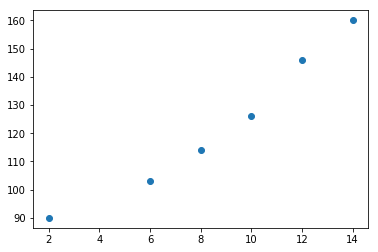

In [3]:
age = [2,6,8,10,12,14]
height = [90,103,114,126,146,160]
plt.scatter(age,height)

Now consider a case in which we have, say 100 variables (p=100). In this case, we can have 100(100-1)/2 = 5000 different plots. It does not make much sense to visualize each of them separately, right? In such cases where we have a large number of variables, it is better to select a subset of these variables (p<<100) which captures as much information as the original set of variables.

Let us understand this with a simple example. Consider the below image:

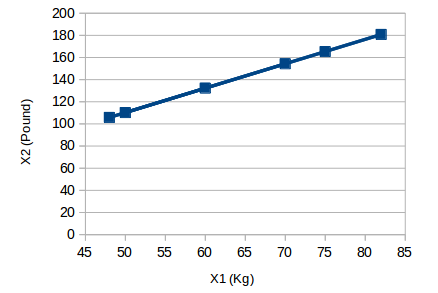

In [4]:
Image(filename='../datasets/Figs/sample_graph.png')

Here we have weights of similar objects in Kg (X1) and Pound (X2). If we use both of these variables, they will convey similar information. So, it would make sense to use only one variable. We can convert the data from 2D (X1 and X2) to 1D (Y1) as shown below:

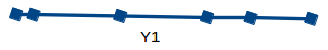

In [5]:
Image(filename='../datasets/Figs/straight_line.png')

Similarly, we can reduce p dimensions of the data into a subset of k dimensions (k<<n). This is called dimensionality reduction.

### 2. Why is Dimensionality Reduction required?

Here are some of the benefits of applying dimensionality reduction to a dataset:

+ Space required to store the data is reduced as the number of dimensions comes down
+ Less dimensions lead to less computation/training time
+ Some algorithms do not perform well when we have a large dimensions. So reducing these dimensions needs to happen for the algorithm to be useful
+ It takes care of multicollinearity by removing redundant features. For example, you have two variables – ‘time spent on treadmill in minutes’ and ‘calories burnt’. These variables are highly correlated as the more time you spend running on a treadmill, the more calories you will burn. Hence, there is no point in storing both as just one of them does what you require
+ It helps in visualizing data. As discussed earlier, it is very difficult to visualize data in higher dimensions so reducing our space to 2D or 3D may allow us to plot and observe patterns more clearly

#### 3. Common Dimensionality Reduction Techniques


We will be using [this](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/) dataset.

Dimensionality reduction can be done in two different ways:

+ Feature Selection - By only keeping the most relevant variables from the original dataset
+ Dimensionality Reduction - By finding a smaller set of new variables, each being a combination of the input variables, containing basically the same information as the input variables 

#### 3.1 Missing Value Ratio

Suppose you’re given a dataset. What would be your first step? You would naturally want to explore the data first before building model. While exploring the data, you find that your dataset has some missing values. Now what? You will try to find out the reason for these missing values and then impute them or drop the variables entirely which have missing values (using appropriate methods).

What if we have too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.

In [14]:
df_train = pd.read_csv(os.path.join(datapath,'CSVs/BigMart_Train.csv'))
df_test = pd.read_csv(os.path.join(datapath,'CSVs/BigMart_Test.csv'))

In [54]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [15]:
# checking the percentage of missing values in each variable
df_train.isnull().sum()/len(df_train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [16]:
# saving missing values in a variable
a = df_train.isnull().sum()/len(df_train)*100

# saving column names in a variable
variables = df_train.columns
variable = [ ]
for i in range(0,12):
    if a[i]<=20:   #setting the threshold as 20%
        variable.append(variables[i])

df_train[variable].isnull().sum()/len(df_train)*100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

#### 3.2 Low Variance Filter

Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance.

So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.

Let’s first impute the missing values in the Item_Weight column using the median value of the known Item_Weight observations. For the Outlet_Size column, we will use the mode of the known Outlet_Size values to impute the missing values:

In [17]:
df_train['Item_Weight'].fillna(df_train['Item_Weight'].median(), inplace=True)
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)

Let’s check whether all the missing values have been filled:

In [18]:
df_train[variable].isnull().sum()/len(df_train)*100

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

Voila! We are all set. Now let’s calculate the variance of all the numerical variables.

In [19]:
df_train.var()

Item_Weight                  1.786956e+01
Item_Visibility              2.662335e-03
Item_MRP                     3.878184e+03
Outlet_Establishment_Year    7.008637e+01
Item_Outlet_Sales            2.912141e+06
dtype: float64

As the above output shows, the variance of Item_Visibility is very less as compared to the other variables. We can safely drop this column. This is how we apply low variance filter.

In [26]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = df_train.select_dtypes(include=numerics).columns
print(numeric_columns)

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')


In [49]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.10))
sel.fit_transform(df_train[numeric_columns])
sel.get_support()

array([ True, False,  True,  True,  True])

In [50]:
numeric_columns_highvar = np.array(numeric_columns)[sel.get_support()]
numeric_columns_highvar

array(['Item_Weight', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'], dtype=object)

In [51]:
df_train[numeric_columns_highvar].head()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,249.8092,1999,3735.1380
1,5.92,48.2692,2009,443.4228
2,17.50,141.6180,1999,2097.2700
3,19.20,182.0950,1998,732.3800
4,8.93,53.8614,1987,994.7052


#### 3.3 High Correlation filter

High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).

As a general guideline, we should keep those variables which show a decent or high correlation with the target variable.

Let’s perform the correlation calculation in Python. We will drop the dependent variable (Item_Outlet_Sales) first and save the remaining variables in a new dataframe.  

In [63]:
df_train_X = df_train.drop('Item_Outlet_Sales', 1)
df_train_X.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,-0.014168,0.024951,0.007739
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834
Item_MRP,0.024951,-0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000


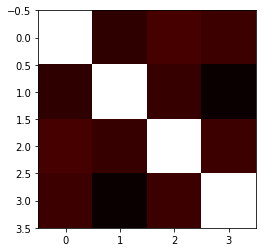

In [64]:
plt.imshow(df_train_X.corr(),cmap='hot',interpolation='nearest')

Wonderful, we don’t have any variables with a high correlation in our dataset. Generally, if the correlation between a pair of variables is greater than 0.5-0.6, we should seriously consider dropping one of those variables.

#### 3.4 Random Forest

Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features.

We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs. Let’s also drop the ID variables (Item_Identifier and Outlet_Identifier) as these are just unique numbers and hold no significant importance for us currently.

In [65]:
from sklearn.ensemble import RandomForestRegressor
df_train_X.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
model = RandomForestRegressor(random_state=1, max_depth=10)
df_train_X=pd.get_dummies(df_train_X)
model.fit(df_train_X,df_train.Item_Outlet_Sales)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

After fitting the model, plot the feature importance graph:

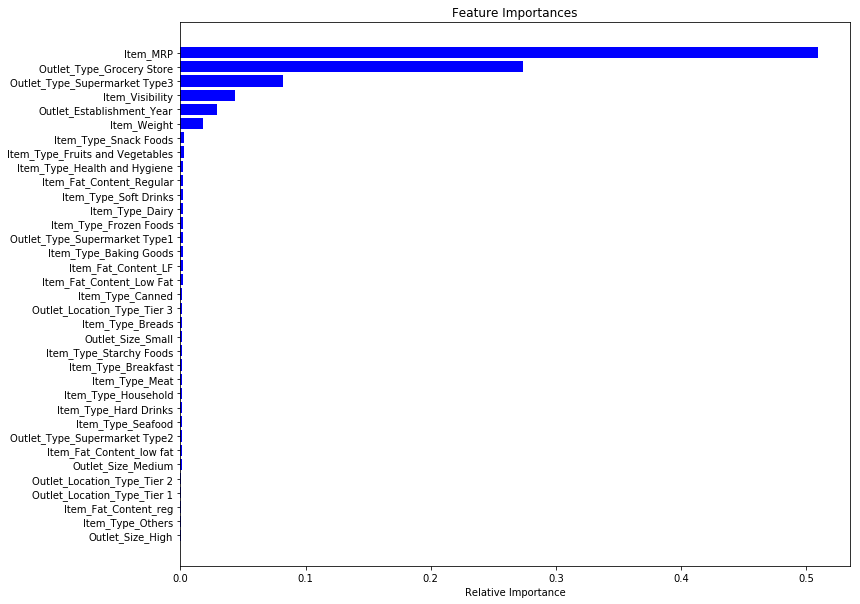

In [78]:
features = df_train_X.columns
importances = model.feature_importances_
indices = np.argsort(importances) #[0:9])  # top 10 features
plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the above graph, we can hand pick the top-most features to reduce the dimensionality in our dataset. 
Alternatively, we can use the [SelectFromModel](http://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-using-selectfrommodel) of sklearn to do so. It selects the features based on the importance of their weights.

In [90]:
from sklearn.feature_selection import SelectFromModel
new_model = SelectFromModel(model)
fit = new_model.fit_transform(df_train_X, df_train.Item_Outlet_Sales)

In [91]:
new_model.get_support()

array([False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True])

In [92]:
selected_columns = np.array(df_train_X.columns)[new_model.get_support()]
selected_columns

array(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type3'],
      dtype=object)

In [94]:
df_train_X[selected_columns].head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type3
0,0.016047,249.8092,1999,0,0
1,0.019278,48.2692,2009,0,0
2,0.016760,141.6180,1999,0,0
3,0.000000,182.0950,1998,1,0
4,0.000000,53.8614,1987,0,0


#### 3.5 Backward Feature Elimination

Follow the below steps to understand and use the ‘Backward Feature Elimination’ technique:

+ We first take all the n variables present in our dataset and train the model using them
+ We then calculate the performance of the model
+ Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables
+ We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable
+ Repeat this process until no variable can be dropped

This method can be used when building Linear Regression or Logistic Regression models. 

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets

lreg = LinearRegression()
rfe = RFE(lreg, 10)

features = rfe.fit_transform(df_train_X, df_train.Item_Outlet_Sales)

We need to specify the algorithm and number of features to select, and we get back the list of variables obtained from backward feature elimination. We can also check the ranking of the variables using the “rfe.ranking_” command.

In [105]:
rfe.n_features_

10

In [106]:
rfe.ranking_

array([25,  4, 16, 14,  8, 24, 10,  9,  1, 19, 23, 22, 11,  5, 15,  3, 21,
       17,  7, 20,  6,  1, 18,  1,  2,  1,  1,  1, 12, 26, 13,  1,  1,  1,
        1])

In [117]:
ranking = [(key,value) for key,value in sorted(dict(zip(df_train_X.columns, rfe.ranking_)).items(), key=lambda x: x[1])]
ranking[0:13]

[('Item_Fat_Content_reg', 1),
 ('Item_Type_Seafood', 1),
 ('Item_Type_Soft Drinks', 1),
 ('Outlet_Size_High', 1),
 ('Outlet_Size_Medium', 1),
 ('Outlet_Size_Small', 1),
 ('Outlet_Type_Grocery Store', 1),
 ('Outlet_Type_Supermarket Type1', 1),
 ('Outlet_Type_Supermarket Type2', 1),
 ('Outlet_Type_Supermarket Type3', 1),
 ('Item_Type_Starchy Foods', 2),
 ('Item_Type_Fruits and Vegetables', 3),
 ('Item_Visibility', 4)]

#### 3.6 Forward Feature Selection

This is the opposite process of the Backward Feature Elimination we saw above. Instead of eliminating features, we try to find the best features which improve the performance of the model. This technique works as follows:

+ We start with a single feature. Essentially, we train the model n number of times using each feature separately
+ The variable giving the best performance is selected as the starting variable
+ Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained
+ We repeat this process until no significant improvement is seen in the model’s performance

In [118]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df_train_X, df_train.Item_Outlet_Sales)

This returns an array containing the [F-values](http://www.statisticshowto.com/probability-and-statistics/f-statistic-value-test/) of the variables and the p-values corresponding to each F value.  
For our purpose, we will select the variables having F-value greater than 10:  

In [119]:
variable = []
for i in range(0,len(df_train_X.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df_train_X.columns[i])

This gives us the top most variables based on the forward feature selection algorithm.

NOTE : Both Backward Feature Elimination and Forward Feature Selection are time consuming and computationally expensive. They are practically only used on datasets that have a small number of input variables.

The techniques we have seen so far are generally used when we do not have a very large number of variables in our dataset. These are more or less feature selection techniques. In the upcoming sections, we will be working with the Fashion MNIST dataset, which consists of images belonging to different types of apparel, e.g. T-shirt, trousers, bag, etc. The dataset can be downloaded from the “IDENTIFY THE APPAREL” practice problem.

The dataset has a total of 70,000 images, out of which 60,000 are in the training set and the remaining 10,000 are test images. For the scope of this article, we will be working only on the training images. The train file is in a zip format. Once you extract the zip file, you will get a .csv file and a train folder which includes these 60,000 images. The corresponding label of each image can be found in the ‘train.csv’ file.